Counter({0: 9900, 1: 100})


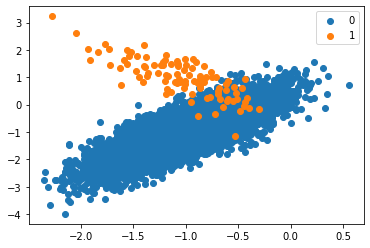

In [1]:
# define an imbalanced dataset with a 1:100 class ratio
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [2]:
# evaluate a majority class classifier on an 1:100 imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, model):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model on the dataset
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores from each fold and each repeat
	return scores

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# define model
model = DummyClassifier(strategy='most_frequent')

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean Accuracy: %.2f%%' % (mean(scores) * 100))

Mean Accuracy: 99.00%
